In [ ]:
from fastai.basics import *
from fastai.vision.all import *
from sklearn import metrics

/home/tiago/anaconda3/envs/fastai/lib/python3.9/site-packages/torch/cuda/__init__.py:52: UserWarning: CUDA initialization: Found no NVIDIA driver on your system. Please check that you have an NVIDIA GPU and installed a driver from http://www.nvidia.com/Download/index.aspx (Triggered internally at  /opt/conda/conda-bld/pytorch_1607370151529/work/c10/cuda/CUDAFunctions.cpp:100.)
  return torch._C._cuda_getDeviceCount() > 0


In [ ]:
%load_ext autoreload
%autoreload 2

In [ ]:
from my_utils import dotdict

In [ ]:
from wandb_sweep import get_dls, get_learner

In [ ]:
from model_eval import get_preds, plot_CM, plot_CM_PR, plot_top_losses_glitches

In [ ]:
import wandb

api = wandb.Api()

In [ ]:
sweep_id = "m4nqsh6e"
sweep = api.sweep(f"ogait/thesis_gravity_spy/{sweep_id}")
best_run_config = sweep.best_run().config

wandb: Sorting runs by -summary_metrics.combined_f1_time


In [ ]:
config = dotdict(best_run_config)
config.correct_labels = True
config.inference = True
config.real_gw_eval = True

In [ ]:
config.real_gw_version = 1
# version w/o shift and vmax=25.5

In [ ]:
dls, _, n_channels = get_dls(config)

In [ ]:
learner = get_learner(config, dls, n_channels)

In [ ]:
learner.load(f"{sweep_id}_run{config.experiment_no}")

<fastai.learner.Learner>

In [ ]:
vocab = list(learner.dls.train_ds.class_dict.keys())

<matplotlib.image.AxesImage>

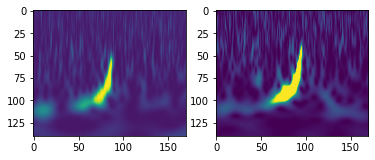

In [ ]:
fig, axes = plt.subplots(1, 2)
axes[0].imshow(dls.train_ds[1741][0][0])
axes[1].imshow(dls.loaders[2].dataset[0][0][0])

<matplotlib.image.AxesImage>

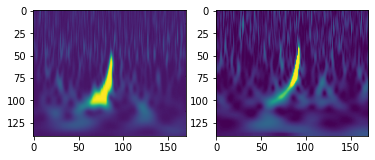

In [ ]:
fig, axes = plt.subplots(1, 2)
axes[0].imshow(dls.train_ds[1742][0][0])
axes[1].imshow(dls.loaders[2].dataset[1][0][0])

<matplotlib.image.AxesImage>

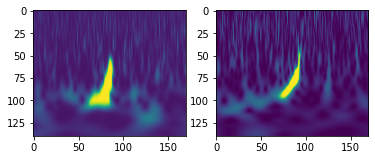

In [ ]:
fig, axes = plt.subplots(1, 2)
axes[0].imshow(dls.train_ds[1743][0][0])
axes[1].imshow(dls.loaders[2].dataset[15][0][0])

<matplotlib.image.AxesImage>

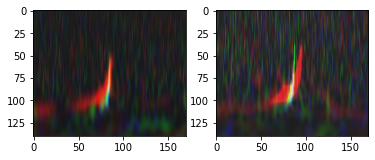

In [ ]:
fig, axes = plt.subplots(1, 2)
axes[0].imshow(dls.train_ds[1741][0].permute(1, 2, 0))
axes[1].imshow(dls.loaders[2].dataset[0][0].permute(1, 2, 0))

<matplotlib.image.AxesImage>

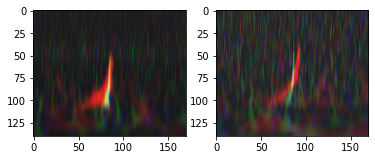

In [ ]:
fig, axes = plt.subplots(1, 2)
axes[0].imshow(dls.train_ds[1742][0].permute(1, 2, 0))
axes[1].imshow(dls.loaders[2].dataset[1][0].permute(1, 2, 0))

<matplotlib.image.AxesImage>

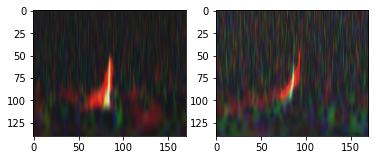

In [ ]:
fig, axes = plt.subplots(1, 2)
axes[0].imshow(dls.train_ds[1743][0].permute(1, 2, 0))
axes[1].imshow(dls.loaders[2].dataset[15][0].permute(1, 2, 0))

Note that the training images seem more centered in time than the real gw dset.

In [ ]:
dls.loaders[2].dataset[1][0].max()

tensor(0.8431)

In [ ]:
gws = dls[2].one_batch()

In [ ]:
gws[0].shape

torch.Size([22, 3, 140, 170])

In [ ]:
gws[0].mean(dim=[0, 2, 3]), gws[0].std(dim=[0, 2, 3])

(tensor([0.1845, 0.1822, 0.1809]), tensor([0.0719, 0.0749, 0.0741]))

In [ ]:
# gspy stats:  
(tensor([0.1783, 0.1513, 0.1418]), tensor([0.1158, 0.0853, 0.0719]))

(tensor([0.1783, 0.1513, 0.1418]), tensor([0.1158, 0.0853, 0.0719]))

In [ ]:
dls.train_ds[1743][0].mean(dim=[1, 2]), dls.train_ds[1743][0].std(dim=[1, 2])

(tensor([0.1557, 0.1302, 0.1245]), tensor([0.1219, 0.0668, 0.0489]))

The real GWs have means and stds different thatn the original dset.  
They are even further than the Chirps present in gspy.

In [ ]:
preds, targets, soft_preds, y_true, y_pred = get_preds(learner, ds_idx=2)

In [ ]:
y_true

tensor([4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4])

In [ ]:
y_pred

[tensor(12),
 tensor(12),
 tensor(17),
 tensor(12),
 tensor(12),
 tensor(12),
 tensor(17),
 tensor(12),
 tensor(12),
 tensor(12),
 tensor(12),
 tensor(12),
 tensor(17),
 tensor(12),
 tensor(12),
 tensor(12),
 tensor(12),
 tensor(12),
 tensor(12),
 tensor(12),
 tensor(17),
 tensor(12)]

In [ ]:
cm = metrics.confusion_matrix(y_true, y_pred, labels=np.arange(22))

In [ ]:
acc = metrics.accuracy_score(y_true, y_pred) * 100
f1 = metrics.f1_score(y_true, y_pred, average="macro") * 100
print(f"Overall accuracy: {acc:.2f}%")
print(f"Macro-averaged F1-score: {f1:.2f}%")

Overall accuracy: 0.00%
Macro-averaged F1-score: 0.00%


In [ ]:
metrics.top_k_accuracy_score(y_true, soft_preds, labels=np.arange(22), k=5)

0.13636363636363635

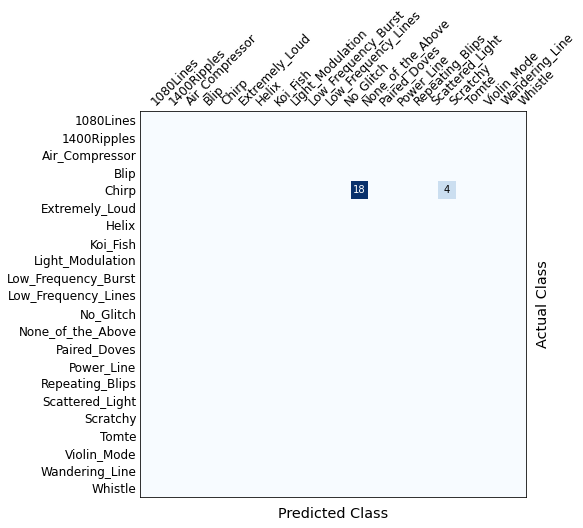

In [ ]:
fig, axes = plot_CM(cm, y_true=y_true, y_pred=y_pred, vocab=vocab, figsize=(8, 8))
#fig.savefig("../figs/glitches/15_baseline_test_cm.pdf", dpi=600, bbox_inches="tight")

In [ ]:
interp = Interpretation.from_learner(learner, ds_idx=2)

In [ ]:
channel_list = [0, 0, 0, 0, 
                0, 0, 0, 0, 
                0, 0, 0, 0,
                0, 0, 0, 0,
                0, 0, 0, 0,
                0, 0]

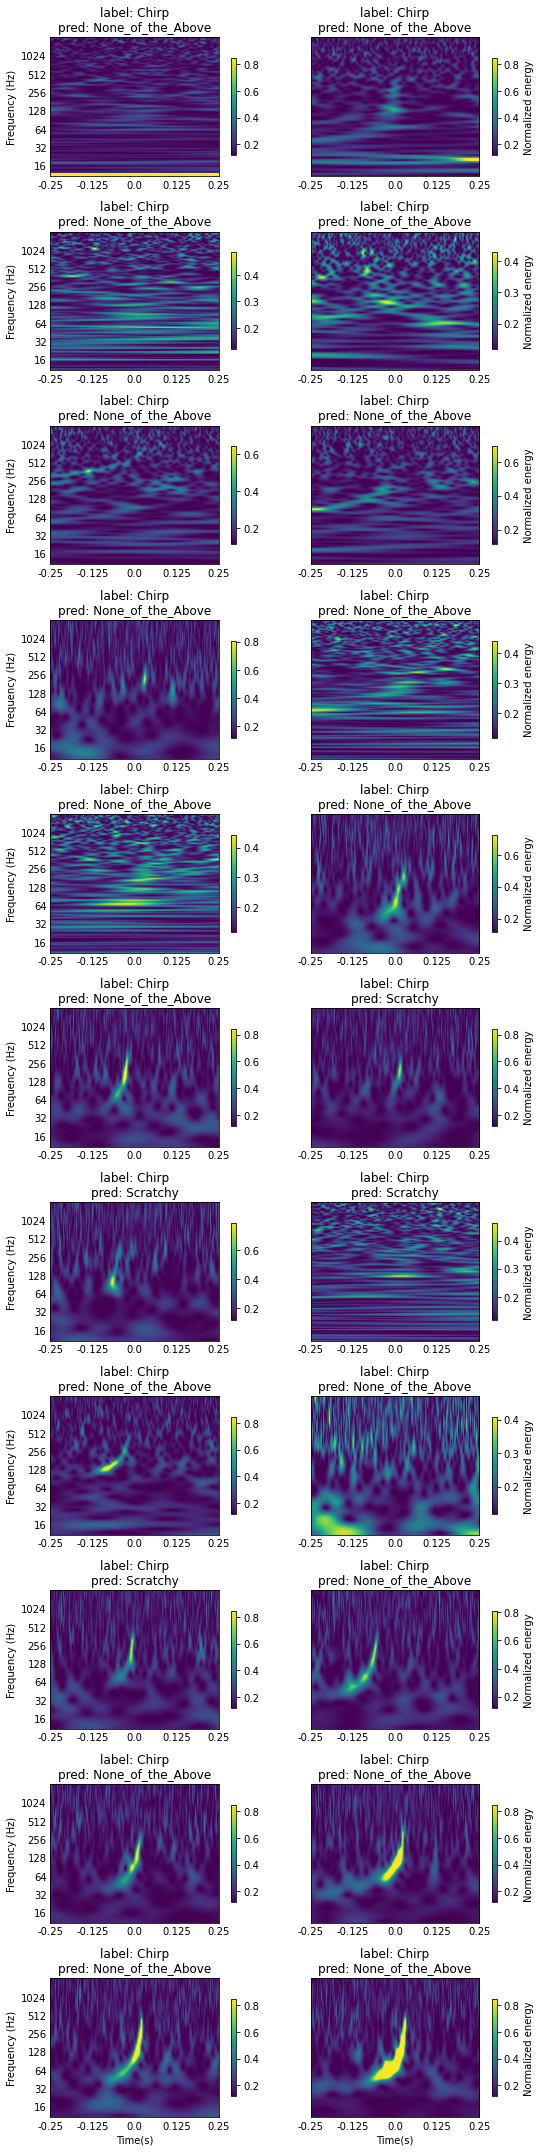

In [ ]:
fig, ax = plot_top_losses_glitches(interp, learner, vocab=vocab, ds_idx=2,
    y_preds=y_pred, channel_list=channel_list,
    largest=True, nrows=11, ncols=2,
    show_label=True, show_pred=True, show_loss=False,
    figsize=(8, 30)
)

Only about 6 of the images can be identified as a Chirp by an human!
They correspond to the ones with lower loss.

In [ ]:
top_losses = interp.top_losses(22)

In [ ]:
for idx in top_losses[1][-6:]:
    top5 = preds[idx].topk(5)
    print([f'{vocab[idx]}: {top5[0][i]:.2e}' for i, idx in enumerate(top5[1])])

['None_of_the_Above: 8.36e-01', 'Whistle: 1.63e-01', 'Wandering_Line: 9.69e-04', 'Koi_Fish: 1.41e-04', 'Extremely_Loud: 1.32e-04']
['None_of_the_Above: 7.80e-01', 'Whistle: 2.01e-01', 'Wandering_Line: 1.45e-02', 'Koi_Fish: 1.28e-03', 'Violin_Mode: 8.60e-04']
['Whistle: 8.76e-01', 'None_of_the_Above: 1.23e-01', 'Wandering_Line: 4.84e-04', 'Chirp: 1.76e-04', 'Koi_Fish: 1.46e-04']
['Whistle: 8.06e-01', 'None_of_the_Above: 1.92e-01', 'Wandering_Line: 1.20e-03', 'Violin_Mode: 2.38e-04', 'Chirp: 2.35e-04']
['None_of_the_Above: 6.01e-01', 'Whistle: 3.95e-01', 'Koi_Fish: 1.43e-03', 'Wandering_Line: 1.22e-03', 'Chirp: 6.39e-04']
['None_of_the_Above: 8.85e-01', 'Whistle: 1.07e-01', 'Koi_Fish: 2.65e-03', 'Wandering_Line: 2.02e-03', 'Chirp: 9.20e-04']


##### Changing mean and std to match gspy

In [ ]:
config.real_gw_normalize = True

In [ ]:
dls, _, n_channels = get_dls(config)

In [ ]:
learner = get_learner(config, dls, n_channels)

In [ ]:
learner.load(f"{sweep_id}_run{config.experiment_no}")

<fastai.learner.Learner>

In [ ]:
vocab = list(learner.dls.train_ds.class_dict.keys())

<matplotlib.image.AxesImage>

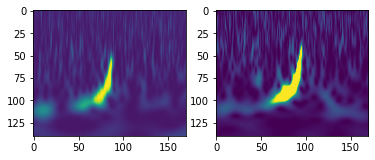

In [ ]:
fig, axes = plt.subplots(1, 2)
axes[0].imshow(dls.train_ds[1741][0][0])
axes[1].imshow(dls.loaders[2].dataset[0][0][0])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


<matplotlib.image.AxesImage>

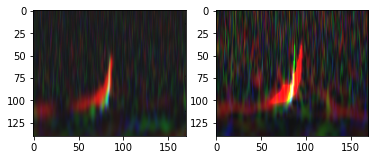

In [ ]:
fig, axes = plt.subplots(1, 2)
axes[0].imshow(dls.train_ds[1741][0].permute(1, 2, 0))
axes[1].imshow(dls.loaders[2].dataset[0][0].permute(1, 2, 0))

In [ ]:
dls.loaders[2].dataset[1][0].max()

tensor(1.2821)

In [ ]:
gws = dls[2].one_batch()

In [ ]:
gws[0].mean(dim=[0, 2, 3]), gws[0].std(dim=[0, 2, 3])

(tensor([0.1784, 0.1514, 0.1418]), tensor([0.1205, 0.0968, 0.0838]))

In [ ]:
# gspy stats:  
(tensor([0.1783, 0.1513, 0.1418]), tensor([0.1158, 0.0853, 0.0719]))

(tensor([0.1783, 0.1513, 0.1418]), tensor([0.1158, 0.0853, 0.0719]))

In [ ]:
dls.train_ds[1743][0].mean(dim=[1, 2]), dls.train_ds[1743][0].std(dim=[1, 2])

(tensor([0.1557, 0.1302, 0.1245]), tensor([0.1219, 0.0668, 0.0489]))

The real GWs have means and stds matching the original dset.  
They are different that the example chirps, though.

In [ ]:
preds, targets, soft_preds, y_true, y_pred = get_preds(learner, ds_idx=2)

In [ ]:
cm = metrics.confusion_matrix(y_true, y_pred, labels=np.arange(22))

In [ ]:
acc = metrics.accuracy_score(y_true, y_pred) * 100
f1 = metrics.f1_score(y_true, y_pred, average="macro") * 100
print(f"Overall accuracy: {acc:.2f}%")
print(f"Macro-averaged F1-score: {f1:.2f}%")

Overall accuracy: 0.00%
Macro-averaged F1-score: 0.00%


In [ ]:
metrics.top_k_accuracy_score(y_true, soft_preds, labels=np.arange(22), k=5)

0.18181818181818182

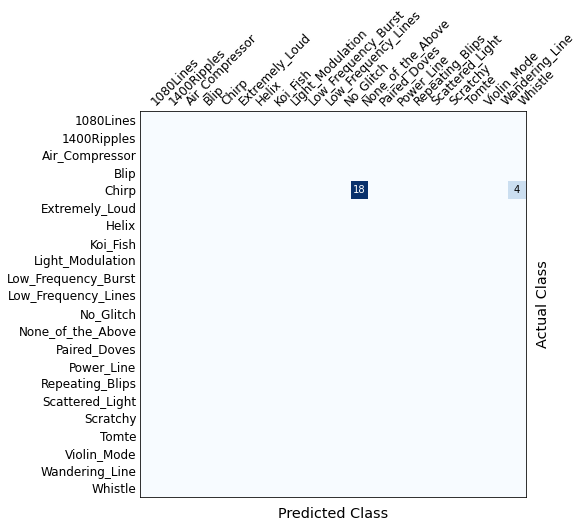

In [ ]:
fig, axes = plot_CM(cm, y_true=y_true, y_pred=y_pred, vocab=vocab, figsize=(8, 8))
#fig.savefig("../figs/glitches/15_baseline_test_cm.pdf", dpi=600, bbox_inches="tight")

The normalization only changed scratchys to whistles.

In [ ]:
interp = Interpretation.from_learner(learner, ds_idx=2)

In [ ]:
channel_list = [0, 0, 0, 0, 
                0, 0, 0, 0, 
                0, 0, 0, 0,
                0, 0, 0, 0,
                0, 0, 0, 0,
                0, 0]

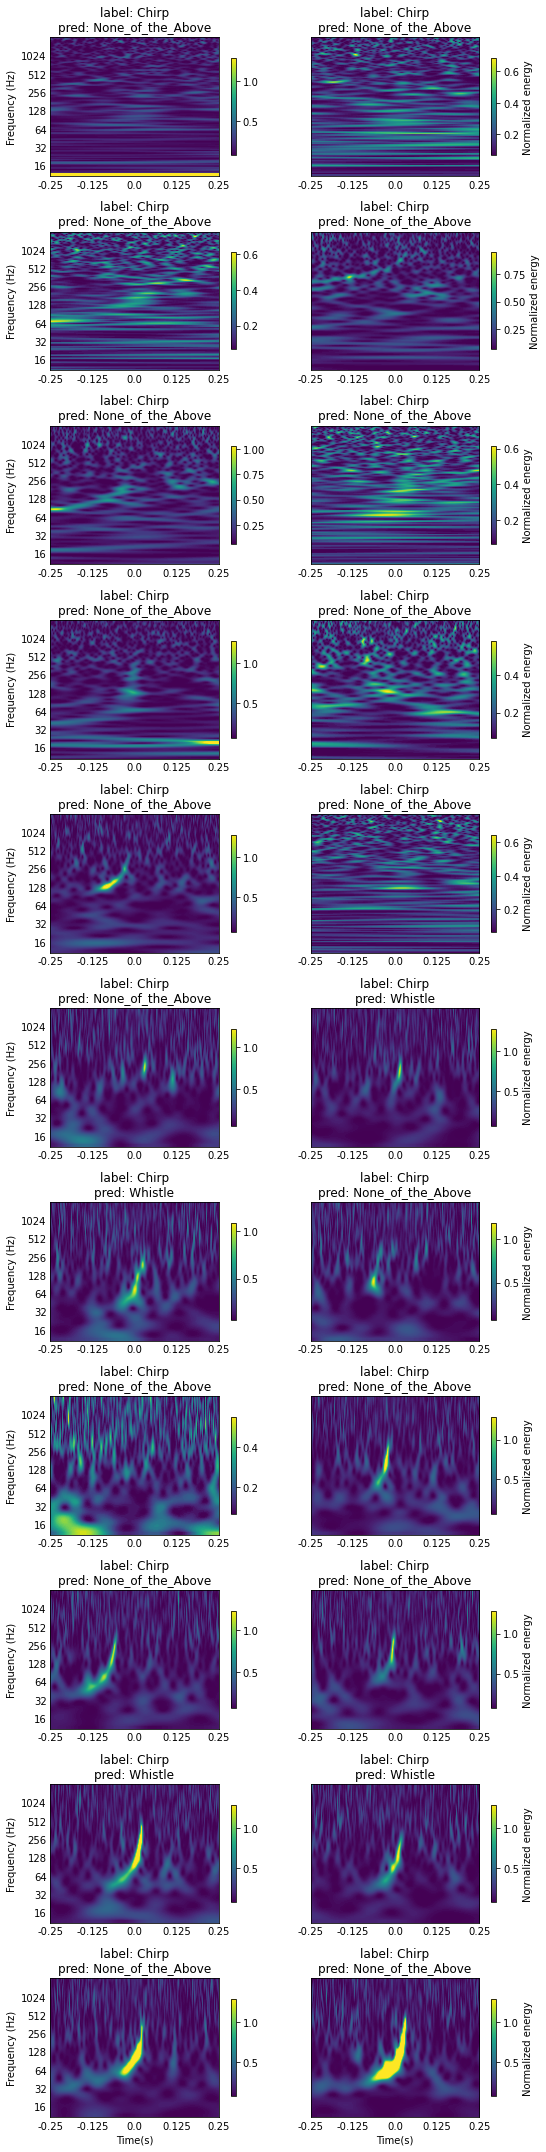

In [ ]:
fig, ax = plot_top_losses_glitches(interp, learner, vocab=vocab, ds_idx=2,
    y_preds=y_pred, channel_list=channel_list,
    largest=True, nrows=11, ncols=2,
    show_label=True, show_pred=True, show_loss=False,
    figsize=(8, 30)
)

In [ ]:
preds[15]

tensor([7.8940e-05, 8.3754e-07, 5.3971e-05, 3.4013e-04, 9.9375e-01, 6.2086e-07,
        1.5755e-06, 2.6832e-05, 4.9405e-06, 7.0500e-07, 3.0570e-06, 1.2062e-04,
        6.1693e-04, 2.3774e-05, 1.8190e-03, 1.7563e-05, 9.7518e-08, 9.2148e-05,
        3.0779e-04, 5.8195e-05, 9.9487e-05, 2.5871e-03])